# Basic Viewer
Ingest the alphas data and try to recreate an image using full sorting.

## Inspect the data.

In [1]:
import numpy as np
import polars as pl

In [2]:
# Define the column names.
column_names = [f"gaussian_{i}_{part}" for i in range(500) for part in ["alpha", "depth", "color_r", "color_g", "color_b"]]
column_names = ["sample_index", "out_color_r", "out_color_g", "out_color_b", "background_r", "background_g", "background_b"] + column_names

# Define schema.
schema_dict = {name: pl.Float32 for name in column_names}
schema_dict["sample_index"] = pl.Int32
schema = pl.Schema(schema_dict)

In [3]:
data = pl.scan_csv('data/collected_splats.csv', schema=schema)
data.head().collect()

sample_index,out_color_r,out_color_g,out_color_b,background_r,background_g,background_b,gaussian_0_alpha,gaussian_0_depth,gaussian_0_color_r,gaussian_0_color_g,gaussian_0_color_b,gaussian_1_alpha,gaussian_1_depth,gaussian_1_color_r,gaussian_1_color_g,gaussian_1_color_b,gaussian_2_alpha,gaussian_2_depth,gaussian_2_color_r,gaussian_2_color_g,gaussian_2_color_b,gaussian_3_alpha,gaussian_3_depth,gaussian_3_color_r,gaussian_3_color_g,gaussian_3_color_b,gaussian_4_alpha,gaussian_4_depth,gaussian_4_color_r,gaussian_4_color_g,gaussian_4_color_b,gaussian_5_alpha,gaussian_5_depth,gaussian_5_color_r,gaussian_5_color_g,gaussian_5_color_b,…,gaussian_492_color_g,gaussian_492_color_b,gaussian_493_alpha,gaussian_493_depth,gaussian_493_color_r,gaussian_493_color_g,gaussian_493_color_b,gaussian_494_alpha,gaussian_494_depth,gaussian_494_color_r,gaussian_494_color_g,gaussian_494_color_b,gaussian_495_alpha,gaussian_495_depth,gaussian_495_color_r,gaussian_495_color_g,gaussian_495_color_b,gaussian_496_alpha,gaussian_496_depth,gaussian_496_color_r,gaussian_496_color_g,gaussian_496_color_b,gaussian_497_alpha,gaussian_497_depth,gaussian_497_color_r,gaussian_497_color_g,gaussian_497_color_b,gaussian_498_alpha,gaussian_498_depth,gaussian_498_color_r,gaussian_498_color_g,gaussian_498_color_b,gaussian_499_alpha,gaussian_499_depth,gaussian_499_color_r,gaussian_499_color_g,gaussian_499_color_b
i32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0,0.220405,0.145551,0.084045,0.0,0.0,0.0,0.012444,4.70976,0.183546,0.146838,0.0,0.017718,4.80475,0.19427,0.172637,0.066444,0.031783,4.83724,0.144537,0.0,0.0,0.006413,4.8484,0.084895,0.0,0.0,0.010319,4.8537,0.176739,0.144124,0.024538,0.028663,4.87658,0.252649,0.151695,0.078134,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.208248,0.133351,0.073434,0.0,0.0,0.0,0.011917,4.70976,0.183546,0.146838,0.0,0.016146,4.80475,0.19427,0.172637,0.066444,0.028991,4.83724,0.144537,0.0,0.0,0.022937,4.8537,0.176739,0.144124,0.024538,0.02277,4.87658,0.252649,0.151695,0.078134,0.048418,4.87802,0.246038,0.154956,0.096859,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.19998,0.128135,0.067008,0.0,0.0,0.0,0.011393,4.70976,0.183546,0.146838,0.0,0.014658,4.80475,0.19427,0.172637,0.066444,0.025508,4.83724,0.144537,0.0,0.0,0.039483,4.8537,0.176739,0.144124,0.024538,0.016729,4.87658,0.252649,0.151695,0.078134,0.014736,4.87802,0.246038,0.154956,0.096859,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200894,0.1327,0.064582,0.0,0.0,0.0,0.010871,4.70976,0.183546,0.146838,0.0,0.013257,4.80475,0.19427,0.172637,0.066444,0.021649,4.83724,0.144537,0.0,0.0,0.052639,4.8537,0.176739,0.144124,0.024538,0.011366,4.87658,0.252649,0.151695,0.078134,0.023761,4.88565,0.228076,0.104272,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.199531,0.131994,0.067462,0.0,0.0,0.0,0.010354,4.70976,0.183546,0.146838,0.0,0.011944,4.80475,0.19427,0.172637,0.066444,0.017724,4.83724,0.144537,0.0,0.0,0.054349,4.8537,0.176739,0.144124,0.024538,0.007142,4.87658,0.252649,0.151695,0.078134,0.025914,4.88565,0.228076,0.104272,0.0,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Create image from out color.

In [4]:
from constants import IMAGE_WIDTH, IMAGE_HEIGHT

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
# Select the out color columns.
out_colors_raw = data.select(pl.col("out_color_r", "out_color_g", "out_color_b")).collect().to_numpy()

## Convert linearized RGB data to w x h x 3 image.

In [7]:
out_colors = out_colors_raw.reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [6.41725e-06..1.14347].


(np.float64(-0.5), np.float64(1263.5), np.float64(831.5), np.float64(-0.5))

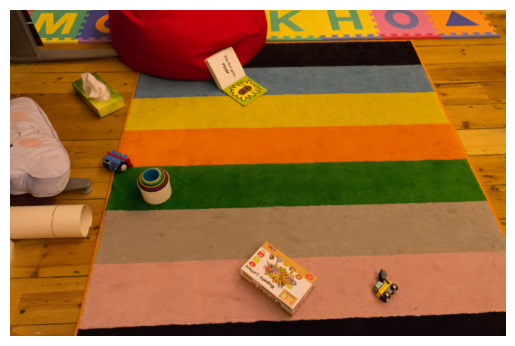

In [8]:
plt.imshow(out_colors)
plt.axis('off')

# Create image by computation.

In [9]:
# Collect all splat columns.
splats_raw = data.select(
    pl.all().exclude("sample_index", "out_color_r", "out_color_g", "out_color_b", "background_r", "background_g", "background_b"))
splats_raw.head().collect()

gaussian_0_alpha,gaussian_0_depth,gaussian_0_color_r,gaussian_0_color_g,gaussian_0_color_b,gaussian_1_alpha,gaussian_1_depth,gaussian_1_color_r,gaussian_1_color_g,gaussian_1_color_b,gaussian_2_alpha,gaussian_2_depth,gaussian_2_color_r,gaussian_2_color_g,gaussian_2_color_b,gaussian_3_alpha,gaussian_3_depth,gaussian_3_color_r,gaussian_3_color_g,gaussian_3_color_b,gaussian_4_alpha,gaussian_4_depth,gaussian_4_color_r,gaussian_4_color_g,gaussian_4_color_b,gaussian_5_alpha,gaussian_5_depth,gaussian_5_color_r,gaussian_5_color_g,gaussian_5_color_b,gaussian_6_alpha,gaussian_6_depth,gaussian_6_color_r,gaussian_6_color_g,gaussian_6_color_b,gaussian_7_alpha,gaussian_7_depth,…,gaussian_492_color_g,gaussian_492_color_b,gaussian_493_alpha,gaussian_493_depth,gaussian_493_color_r,gaussian_493_color_g,gaussian_493_color_b,gaussian_494_alpha,gaussian_494_depth,gaussian_494_color_r,gaussian_494_color_g,gaussian_494_color_b,gaussian_495_alpha,gaussian_495_depth,gaussian_495_color_r,gaussian_495_color_g,gaussian_495_color_b,gaussian_496_alpha,gaussian_496_depth,gaussian_496_color_r,gaussian_496_color_g,gaussian_496_color_b,gaussian_497_alpha,gaussian_497_depth,gaussian_497_color_r,gaussian_497_color_g,gaussian_497_color_b,gaussian_498_alpha,gaussian_498_depth,gaussian_498_color_r,gaussian_498_color_g,gaussian_498_color_b,gaussian_499_alpha,gaussian_499_depth,gaussian_499_color_r,gaussian_499_color_g,gaussian_499_color_b
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,…,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
0.012444,4.70976,0.183546,0.146838,0.0,0.017718,4.80475,0.19427,0.172637,0.066444,0.031783,4.83724,0.144537,0.0,0.0,0.006413,4.8484,0.084895,0.0,0.0,0.010319,4.8537,0.176739,0.144124,0.024538,0.028663,4.87658,0.252649,0.151695,0.078134,0.033474,4.87802,0.246038,0.154956,0.096859,0.036741,4.88359,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.011917,4.70976,0.183546,0.146838,0.0,0.016146,4.80475,0.19427,0.172637,0.066444,0.028991,4.83724,0.144537,0.0,0.0,0.022937,4.8537,0.176739,0.144124,0.024538,0.02277,4.87658,0.252649,0.151695,0.078134,0.048418,4.87802,0.246038,0.154956,0.096859,0.012832,4.88359,0.289507,0.113488,0.086224,0.009096,4.88565,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.011393,4.70976,0.183546,0.146838,0.0,0.014658,4.80475,0.19427,0.172637,0.066444,0.025508,4.83724,0.144537,0.0,0.0,0.039483,4.8537,0.176739,0.144124,0.024538,0.016729,4.87658,0.252649,0.151695,0.078134,0.014736,4.87802,0.246038,0.154956,0.096859,0.004105,4.88491,0.302295,0.23423,0.137952,0.016762,4.88565,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010871,4.70976,0.183546,0.146838,0.0,0.013257,4.80475,0.19427,0.172637,0.066444,0.021649,4.83724,0.144537,0.0,0.0,0.052639,4.8537,0.176739,0.144124,0.024538,0.011366,4.87658,0.252649,0.151695,0.078134,0.023761,4.88565,0.228076,0.104272,0.0,0.016602,4.89165,0.177648,0.0,0.0,0.009208,4.89334,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.010354,4.70976,0.183546,0.146838,0.0,0.011944,4.80475,0.19427,0.172637,0.066444,0.017724,4.83724,0.144537,0.0,0.0,0.054349,4.8537,0.176739,0.144124,0.024538,0.007142,4.87658,0.252649,0.151695,0.078134,0.025914,4.88565,0.228076,0.104272,0.0,0.008337,4.89165,0.177648,0.0,0.0,0.005794,4.89334,…,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Full image computation


In [10]:
from tqdm.auto import tqdm
from joblib import Parallel, delayed

In [11]:
# Collect splats.
splats_raw_collected = splats_raw.collect().to_numpy()
splats_reshaped = splats_raw_collected.reshape((IMAGE_HEIGHT * IMAGE_WIDTH, splats_raw_collected.shape[1] // 5, 5))

In [21]:
def alpha_over_pixel(pixel_splats):
    """Compute alpha over for splats in a pixel."""
    transmittance = 1.0
    pixel_color = np.zeros(3)
    
    # Loop through each splat.
    for alpha, depth, *splat_color in pixel_splats:
        # Skip transparent splats.
        if alpha == 0:
            continue
        # Exit once transmittance is basically zero.
        if transmittance <= 0.001:
            break
        
        # Compute pixel color.
        pixel_color += alpha * np.array(splat_color) * transmittance
        
        # Update transmittance.
        transmittance *= 1 - min(1, alpha)
    
    return pixel_color

In [22]:
computed_image = [alpha_over_pixel(pixel_splats) for pixel_splats in tqdm(splats_reshaped)]

  0%|          | 0/1051648 [00:00<?, ?it/s]

### Display the computed image.

In [24]:
computed_image_reshaped = np.array(computed_image).reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1433120534138652].


(np.float64(-0.5), np.float64(1263.5), np.float64(831.5), np.float64(-0.5))

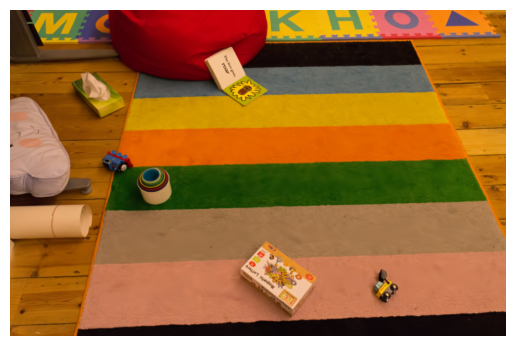

In [25]:
plt.imshow(computed_image_reshaped)
plt.axis('off')

### Compute metrics compared to original image.


In [26]:
# Compute channel percent error.
absolute_difference = np.abs(computed_image_reshaped - out_colors)
percent_error = absolute_difference / out_colors * 100


In [27]:
from matplotlib.colors import LogNorm

In [28]:
# Mean percent error per pixel as a heat map
per_pixel_error = np.mean(percent_error, axis=2)

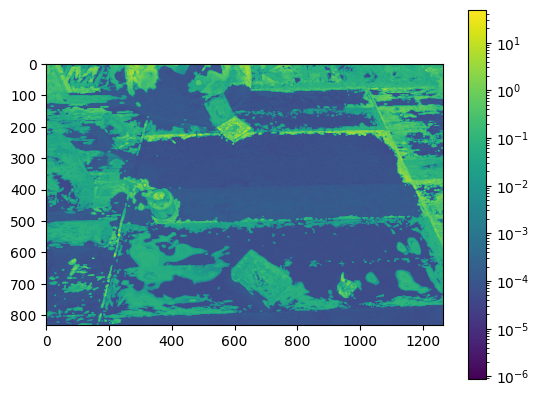

In [29]:
minimum_error = np.nanmin(per_pixel_error)
maximum_error = np.nanmax(per_pixel_error[np.isfinite(per_pixel_error)])
plt.imshow(per_pixel_error, norm=LogNorm(vmin=minimum_error, vmax=maximum_error))
plt.colorbar()